# Quickstart

If you have a working version of Python 2 or 3 on your system
(we recommend [Anaconda Python](https://www.continuum.io/downloads)),
you can simply install the latest stable release of the *lightkurve* package using ``pip``:
```
$ pip install pyketools
```
With *lightkurve* installed, it is easy to create a lightcurve from the pixels of a Kepler target.
For example, let's download and display the pixels of Kepler target "KIC 8462852", also known as *Tabby's Star* or *Boyajian's Star*.

First, we start Python and import the *KeplerTargetPixelFile* class:

In [93]:
from lightkurve import KeplerTargetPixelFile

Next, we obtain the desired data from the data archive at MAST:

In [103]:
tpf = KeplerTargetPixelFile.from_archive(8462852, quarter=16,
                                         quality_bitmask='hardest');

INFO: Found cached file ./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2013098041711_lpd-targ.fits.gz with expected size 7026906. [astroquery.query]


Next, let's display the first cadence:

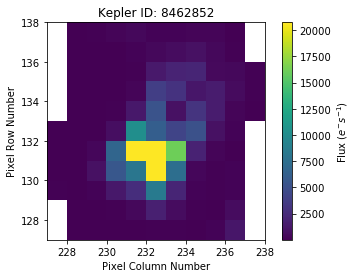

In [100]:
%matplotlib inline
tpf.plot(frame=1);

It looks like we have an isolated star, so we can use simple aperture photometry to extract a lightcurve as follows:

In [101]:
lc = tpf.to_lightcurve();

The above method returned a `KeplerLightCurve` object which gives us access to the flux over time:

In [105]:
lc.time, lc.flux

(array([ 1472.11777934,  1472.13821223,  1472.15864492, ...,  1557.89718798,
         1557.9380561 ,  1557.95849016]),
 array([ 235170.921875,  235088.515625,  235086.109375, ...,  236474.09375 ,
         236390.265625,  236437.140625], dtype=float32))

We can plot these data using the `plot()` method:

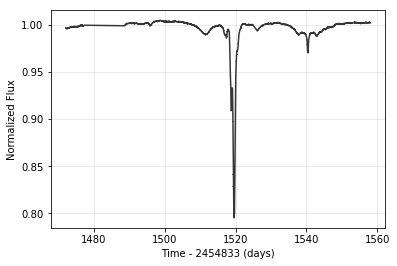

In [102]:
lc.plot(linestyle='solid');

Oh, it looks like we re-discovered one of the [intriguing dips in Tabby's star](https://en.wikipedia.org/wiki/KIC_8462852#Luminosity)!